#**Exploratory Data Analysis in Superstore Dataset**

###Libraries import

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

###Loading dataset

In [106]:
df=pd.read_csv('/content/train.csv',index_col=0)

###Dataset Exploration

In [107]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
1.0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2.0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3.0,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4.0,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5.0,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [108]:
df.shape

(14779, 17)

###Attributing Information

In [109]:
df['Country'].unique()

array(['United States', nan], dtype=object)

In [110]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office', nan], dtype=object)

In [111]:
df.describe()

,Postal Code,Sales
count,14757.000000,14778.000000
mean,55392.713898,231.291228
std,32113.394237,623.172853
min,1040.000000,0.444000
25%,23223.000000,17.442500
50%,60035.000000,54.960000
75%,90008.000000,210.002500
max,99301.000000,22638.480000


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 14779 entries, 1.0 to 9800.0
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       14778 non-null  object 
 1   Order Date     14778 non-null  object 
 2   Ship Date      14778 non-null  object 
 3   Ship Mode      14778 non-null  object 
 4   Customer ID    14778 non-null  object 
 5   Customer Name  14778 non-null  object 
 6   Segment        14778 non-null  object 
 7   Country        14778 non-null  object 
 8   City           14778 non-null  object 
 9   State          14778 non-null  object 
 10  Postal Code    14757 non-null  float64
 11  Region         14778 non-null  object 
 12  Product ID     14778 non-null  object 
 13  Category       14778 non-null  object 
 14  Sub-Category   14778 non-null  object 
 15  Product Name   14778 non-null  object 
 16  Sales          14778 non-null  float64
dtypes: float64(2), object(15)
memory usage: 2.0+ 

In [113]:
df.isna().sum().sum()
df.duplicated().sum()

4979

In [114]:
df.nunique()

Order ID         4922
Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64

In [115]:
df['Sub-Category'].dtype

dtype('O')

In [116]:
df['State'].value_counts()

California              2955
New York                1644
Texas                   1477
Pennsylvania             848
Washington               778
Illinois                 746
Ohio                     680
Florida                  559
Michigan                 373
North Carolina           367
Virginia                 354
Arizona                  319
Tennessee                303
Georgia                  258
Colorado                 252
Kentucky                 210
Massachusetts            208
Oregon                   198
Indiana                  188
New Jersey               180
Maryland                 162
Wisconsin                160
Delaware                 145
Connecticut              133
Minnesota                120
Oklahoma                 101
Missouri                  99
Arkansas                  98
Rhode Island              87
Alabama                   83
Mississippi               79
Utah                      67
Nevada                    65
South Carolina            63
Nebraska      

In [117]:
df['Region'].dropna(inplace=True)
df['Region'].nunique()

4

###Data Cleaning

In [118]:
df = df.drop(['Postal Code', 'Country'], axis=1, errors='ignore')

In [119]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,
1.0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2.0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3.0,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4.0,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5.0,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


##Data Visualization

###Sorting

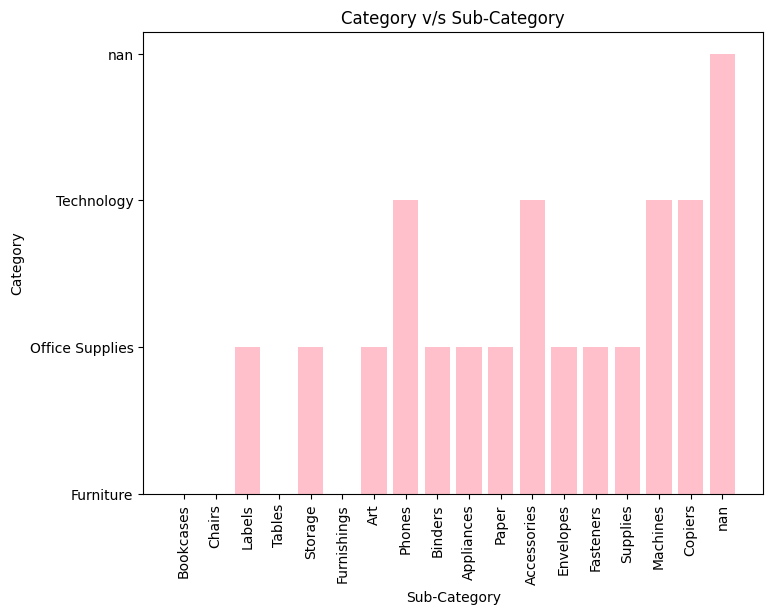

In [137]:
# Convert 'Sub-Category' and 'Category' columns to strings
df['Sub-Category'] = df['Sub-Category'].astype(str)
df['Category'] = df['Category'].astype(str)

# Set the figure size for the plot
plt.figure(figsize=(8, 6))

# Create a bar plot with converted data
plt.bar(df['Sub-Category'], df['Category'], color='pink')

# Set the title of the plot
plt.title('Category v/s Sub-Category')

# Set labels for the x and y axes
plt.xlabel('Sub-Category')
plt.ylabel('Category')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()


<Figure size 800x600 with 0 Axes>

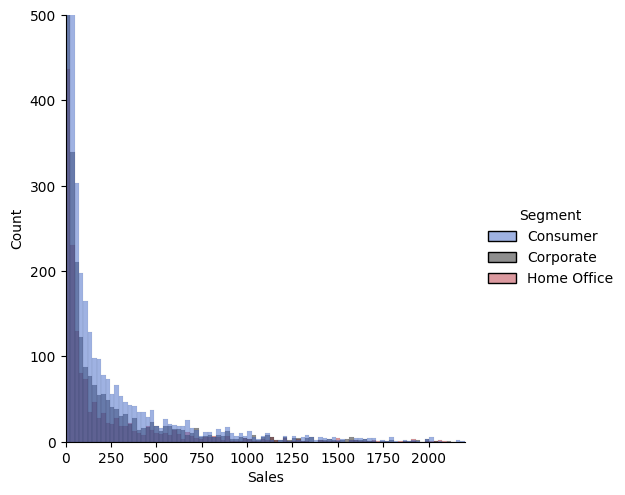

In [121]:
# Remove duplicates from the DataFrame
df_no_duplicates = df.drop_duplicates(subset=['Sales', 'Segment'])

# Set the figure size for the plot
plt.figure(figsize=(8, 6))

# Create a displot with the DataFrame without duplicates
sns.displot(x='Sales', data=df_no_duplicates, hue='Segment', palette='icefire')

# Set x-axis and y-axis limits
plt.xlim([0, 2200])
plt.ylim([0, 500])

# Display the plot
plt.show()


<ipython-input-132-0ac95b74fa8b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Sales', data=df_cleaned, palette='viridis')


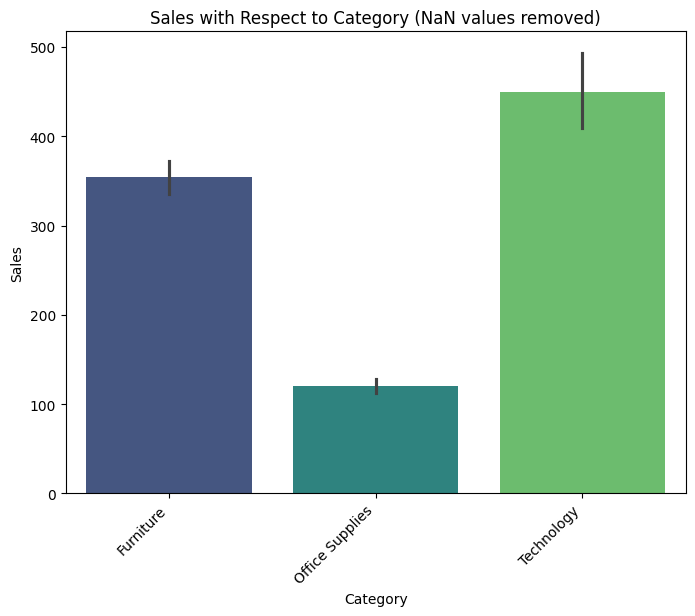

In [132]:

# Assuming df is your DataFrame

# Drop rows with NaN values in 'Sales' or 'Category'
df_cleaned = df.dropna(subset=['Sales', 'Category'])

# Set the figure size for the plot
plt.figure(figsize=(8,6))

# Create a bar plot with the cleaned DataFrame
sns.barplot(x='Category', y='Sales', data=df_cleaned, palette='viridis')

# Set the title of the plot
plt.title('Sales with Respect to Category (NaN values removed)')

# Set labels for the x and y axes
plt.xlabel('Category')
plt.ylabel('Sales')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


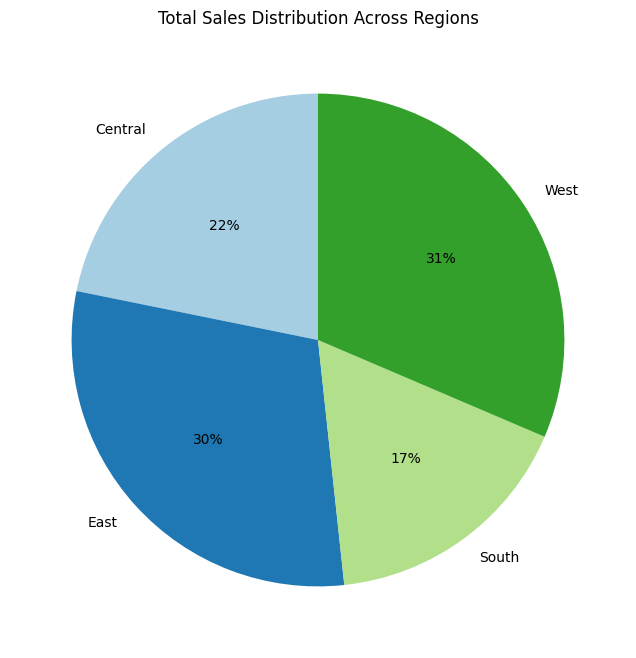

In [136]:
# Calculate total sales for each region
total_sales_by_region = df.groupby('Region')['Sales'].sum()

# Set the figure size for the pie chart
plt.figure(figsize=(8, 8))

# Create a pie chart for total sales distribution across regions
plt.pie(total_sales_by_region, labels=total_sales_by_region.index, autopct='%1.0f%%', startangle=90, colors=plt.cm.Paired.colors)

# Set the title of the pie chart
plt.title('Total Sales Distribution Across Regions')

# Display the plot
plt.show()


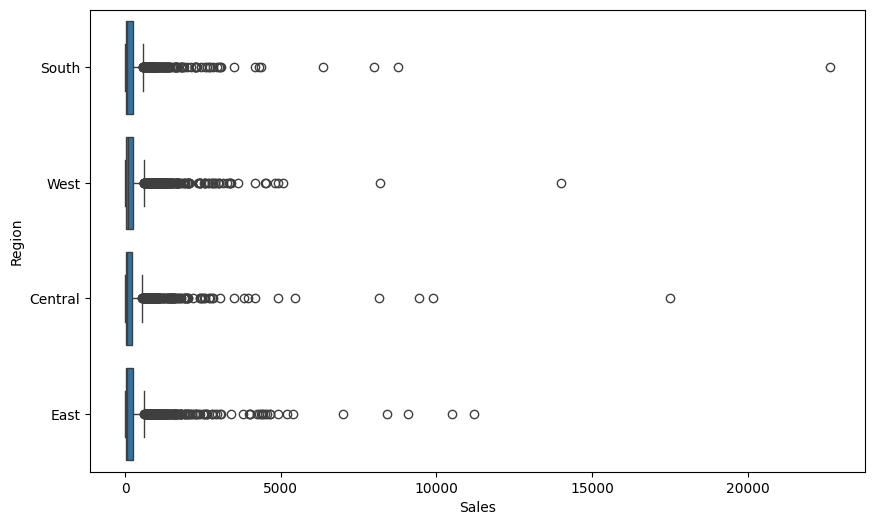

In [123]:

# Remove duplicates from the DataFrame
df_no_duplicates = df.drop_duplicates(subset=['Sales', 'Region'])

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a boxplot with the DataFrame without duplicates
sns.boxplot(x="Sales", y="Region", data=df_no_duplicates)

# Display the plot
plt.show()


<ipython-input-135-57cef730fa53>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Segment', y='Sales', hue='Region', data=superstore_df, ci=None, palette='viridis', estimator=sum)


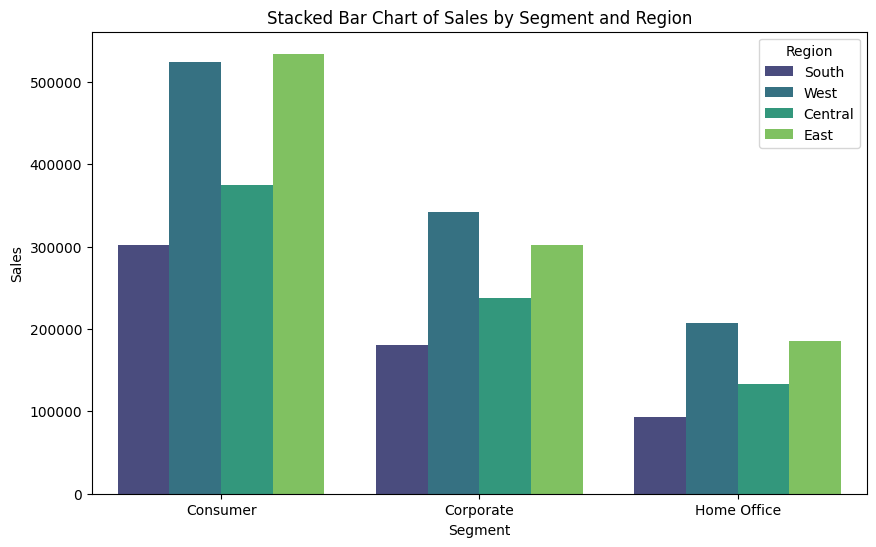

In [135]:
# Exclude rows with NaN values in the 'Segment' column
superstore_df = df.dropna(subset=['Segment'])

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Plotting the stacked bar chart with seaborn
sns.barplot(x='Segment', y='Sales', hue='Region', data=superstore_df, ci=None, palette='viridis', estimator=sum)

# Set the title of the plot
plt.title('Stacked Bar Chart of Sales by Segment and Region')
plt.xlabel('Segment')
plt.ylabel('Sales')

plt.legend(title='Region')

plt.show()


<ipython-input-125-115313b57461>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


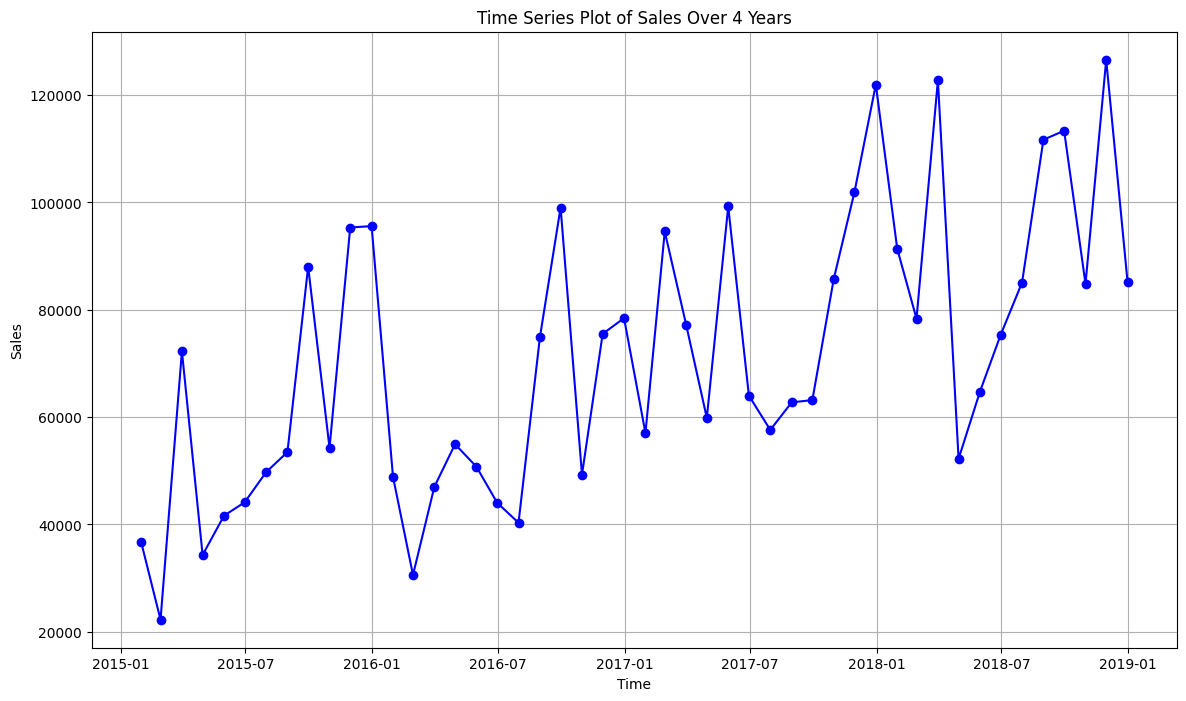

In [125]:
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Set 'Order Date' as the index
df.set_index('Order Date', inplace=True)

# Resample the data to monthly frequency and sum the sales for each month
monthly_sales = df['Sales'].resample('M').sum()

# Plotting the time series plot
plt.figure(figsize=(14, 8))
plt.plot(monthly_sales, marker='o', linestyle='-', color='b')
plt.title('Time Series Plot of Sales Over 4 Years')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.grid(True)
plt.show()